<h1 style="text-align:center">Machine Learning</h1>
<h2 style="text-align:center">Felix Filipi-2301877590</h2>

<h3>1. Observe thoroughly the table below showing 4 datasets with 10 
dimensions. If your object query having vector (1,1,1,1,1,1,1,1,1,1) and the similarity is 
calculated based on Euclidean distance metric and k-NN (k-Nearest Neighbour) algorithm, find 
the most similar object with the object query. To obtain a reasonable computational accuracy, 
make sure the dataset has been normalized and you get the best possible “k”.

Build Dataset (4 dataset provided + the object query)

In [1]:
import pandas as pd
import numpy as np
ds = pd.DataFrame({'ID':[1,2,3,4,5],'d1':[1.1,1.4,1,20,1],'d2':[100,1.4,1,20,1],'d3':[1.2,1.4,1,20,1]
                         ,'d4':[1.6,1.5,1,20,1],'d5':[1.6,100,1,20,1],'d6':[1.1,1.4,1,20,1],'d7':[1.2,1.2,2,20,1],
                         'd8':[1.2,1.2,100,20,1],'d9':[1,1,2,20,1],'d10':[1,1,2,20,1]})
ds

,ID,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,1,1.1,100.0,1.2,1.6,1.6,1.1,1.2,1.2,1,1
1,2,1.4,1.4,1.4,1.5,100.0,1.4,1.2,1.2,1,1
2,3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,100.0,2,2
3,4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20,20
4,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


Drop Useless Column & change DataFrame type to numpy array

In [2]:
ds = ds.drop('ID', 1)
ds = ds.values

Normalization (To obtain a reasonable computational accuracy, make sure the dataset has been normalized)

In [3]:
# Find min and max values for each column (min-max)
def MinMaxValues(x):
    min_max_values = list()
    for i in range(len(x[0])):
        col = [row[i] for row in x]
        value_min = min(col)
        value_max = max(col)
        min_max_values.append([value_min, value_max])
    return min_max_values
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(x, y):
    for row in x:
        for i in range(len(row)):
            row[i] = (row[i] - y[i][0]) / (y[i][1] - y[i][0])


scaled_feature = MinMaxValues(ds)
normalize_dataset(ds, scaled_feature)

Define train and test

In [4]:
train = ds[:-1,:]
test = ds[-1:,:]

Train (object that needs to be found to find the most similar value to the query object)

Test (Object Query) which will be the target to find the most similar value to query object

In [5]:
test.shape

(1, 10)

I need to reshape the test because it's two dimension array, need to change its dimension

In [6]:
test=test.reshape(-1)

In [7]:
test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The similarity is calculated based on Euclidean distance metric and k-NN (k-Nearest Neighbour) algorithm, find 
the most similar object with the object query.

The euclidean distance gained from this formula: $Ed = \sqrt{\sum_{i=1}^n(x_{i}-y_{i})^2}$

Where $x_{i}$ = training point, and $y_{i}$ = testing point

As example for the first object (dataset ID 1) euclidean distance can be written as:

$Ed_{1} = \sqrt{(0.005263-0.0)^2+(1.000000-0.0)^2+(0.010526-0.0)^2+(0.031579-0.0)^2+(0.006061-0.0)^2\\+(0.005263-0.0)^2+(0.010526-0.0)^2+(0.002020-0.0)^2+(0.000000-0.0)^2+(0.000000-0.0)^2}$

$Ed_{1} = \sqrt{(0.005263)^2+(1.000000)^2+(0.010526)^2+(0.031579)^2+(0.006061)^2\\+(0.005263)^2+(0.010526)^2+(0.002020)^2+(0.000000)^2+(0.000000)^2}$

$Ed_{1} = 1.00065731$

Here's the euclidean_distance code from scratch

In [8]:
from math import sqrt

def euclidean_distance(x,y):
    ED=0
    for i in range(len(x)): #every data in its row
        ED += (x[i]-y[i])**2 #formula give in description above
    return sqrt(ED)

distance_each_object=[]
for i in range (4): #for each row in train set
    distance=euclidean_distance(train[i],test)
    distance_each_object.append(distance)
distance_each_object

[1.000657309166915, 1.001076106032869, 1.0041465278073112, 2.666551879990477]

And here's the output of the euclidean distance for each object/dataset given

We can see that the most similar object with the object query (1,1,1,1,1,1,1,1,1,1) / test set is the <b>1st dataset (dataset ID 1)</b>, which has the smallest distance compared to others. 

So, the smaller distance from the object and object query, give the similar result to the object query. And this <b>(dataset ID 1) is the best "k" for the training </b>

<b>*Note:</b> the problem given is not clear enough, it is said that to obtain reasonable accuracy, and find the most suitable "k". However, from the data provided, we cannot classify the data and cannot find the accuracy or the best k needed for the model, because the dataset is not labeled (not supervised), and there's no data for testing, so the accuracy of the model cannot be determined properly. I'm sure that $"k"$ in here's the parameter which stands for how much closest training data to the given test data need to be considered to classify the testing data. But still here's no testing data and label to determine it. So the instruction can be worked only to get the euclidean distance 

<h3>2. Given datasets (UAS_ML2021_DATASET01.csv), determine weight W’s
and bias b of the corresponding SVM linear discriminant function f(X) = WT
. X + b using hand calculation. You may need to modify the label/target values from 1 and 0 become 1 and -1. To 
confirm whether your calculation result is correct, you may run the corresponding SVM library 
provided by python (write the code in python notebook please).

Import dataset

In [9]:
ds2 = pd.read_csv('datasets/UAS_ML2021_DATASET01.csv')
ds2

,Attrib_01,Attrib_02,Label
0,-2.264542,-0.505704,1
1,-2.086426,0.655405,1
2,-2.367950,0.318477,1
3,-2.304197,0.575368,1
4,-2.388777,-0.674767,1
...,...,...,...
145,1.870522,-0.382822,0
146,1.558492,0.905314,0
147,1.520845,-0.266795,0
148,1.376391,-1.016362,0


<b>SVM by hand calculation

The training data is linearly separable (according to instruction), so we need to separate the two classes of data to make the distance between them as large as possible. 

Given a formula of hyperplane $H_{0}$ which separating the dataset: 

<p style="text-align:center">$w \cdot x+b=0$ 

Now, we can select the margin / two others hyperplanes positive hyperplane $H_{1}$ and negative hyperplane $H_{2}$ which also separate the data and have the following equations:
    
<p style="text-align:center">$w \cdot x+b\ge 1$ <br><br> and <br><br>$w \cdot x+b\le- 1$ <br><br><br>So $H_{0}$ is equidistant from $H_{1}$ and $H_{2}$.
    
The value should be set as 1, because both must have same value, so the 0 answer cant be used in this statement. If it's valued as 0 we cant determine which is positive and negative. So to simplify the problem, we can put it as 1. 
    
But we want to make sure that they have no points between them. So we will only select those who meet the two following constraints:

<p style="text-align:center">$w \cdot x_{i}+b\ge1$ for $x_{i}$ having the class $1$, 

<p style="text-align:center">and

<p style="text-align:center">$w \cdot x_{i}+b\le-1$ for $x_{i}$ having the class $-1$ 

According to that explanation, we already know about why we need to modify the label/target values from 1 and 0, to become 1 and -1. To modify this label, we can use Pandas DataFrame function which is loc function to change the value, and here's the code:

In [10]:
ds2.loc[ds2['Label'] == 0, 'Label'] = -1
ds2.columns = ['x1', 'x2','Label']
ds2

,x1,x2,Label
0,-2.264542,-0.505704,1
1,-2.086426,0.655405,1
2,-2.367950,0.318477,1
3,-2.304197,0.575368,1
4,-2.388777,-0.674767,1
...,...,...,...
145,1.870522,-0.382822,-1
146,1.558492,0.905314,-1
147,1.520845,-0.266795,-1
148,1.376391,-1.016362,-1


As we can see here, the data have float type, because we will do hand calculation analysis on this dataset, we can round it to 2 digit after comma (this round affect the calculation little bit, but will make us easier to calculate it), here's the code

In [11]:
ds2=ds2.round(2)

After round the value, we can input the dataset into the formula described above, as example:

$w_{1} \cdot x_{1}+w_{2} \cdot x_{2}+b\ge1$

$w_{1} \cdot -2.26+w_{2} \cdot -0.51+b\ge1$

$-2.26 w_{1} +-0.51 w_{2}+b\ge1$ (Example: 1st data)

Now, we can take a look for the data point to analyticaly hand-calculating the SVM process

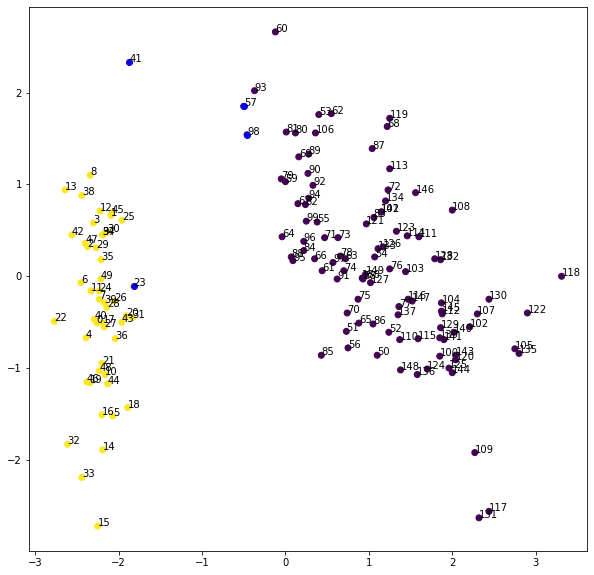

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(ds2.iloc[:,0],ds2.iloc[:,1],c=ds2['Label'])
plt.scatter(ds2.iloc[23,0],ds2.iloc[23,1],c='blue') #The support vector
plt.scatter(ds2.iloc[41,0],ds2.iloc[41,1],c='blue') #The support vector
plt.scatter(ds2.iloc[57,0],ds2.iloc[57,1],c='blue') #The support vector
plt.scatter(ds2.iloc[98,0],ds2.iloc[98,1],c='blue') #The support vector
for i in range(ds2.shape[0]):
    plt.text(ds2.iloc[i,0],ds2.iloc[i,1], str(i))

To make sure the support vector is right, we can plot the margin

In [13]:
print(ds2.iloc[23,0],ds2.iloc[23,1])
print(ds2.iloc[41,0],ds2.iloc[41,1])
print(ds2.iloc[57,0],ds2.iloc[57,1])
print(ds2.iloc[98,0],ds2.iloc[98,1])

-1.82 -0.11
-1.87 2.33
-0.5 1.85
-0.46 1.54


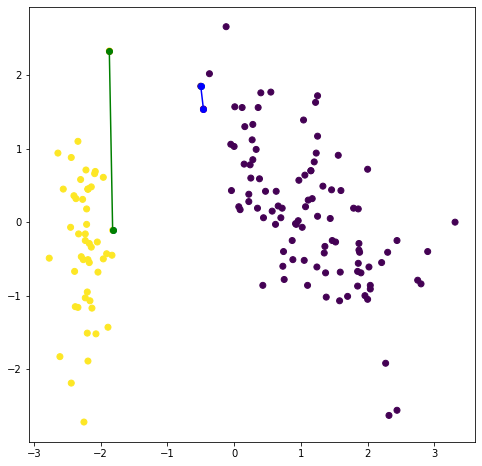

In [14]:
x2,y2 = [-1.82,-1.87],[-0.11,2.33]
x3,y3 = [-0.5,-0.46],[1.85,1.54]

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(ds2.iloc[:,0],ds2.iloc[:,1],c=ds2['Label'])
plt.scatter(ds2.iloc[23,0],ds2.iloc[23,1]) #Support Vector
plt.scatter(ds2.iloc[41,0],ds2.iloc[41,1]) #Support Vector
plt.scatter(ds2.iloc[57,0],ds2.iloc[57,1]) #Support Vector
plt.scatter(ds2.iloc[98,0],ds2.iloc[98,1]) #Support Vector
plt.plot(x2, y2, marker = 'o',c='green')
plt.plot(x3, y3, marker = 'o',c='blue')
plt.show()

As we can see, the data contain 150 points of data, and as shown is linearly separable, but we does only need to have 4 points from the image above, this 4 points called as support vector, we need to analyticaly determine the support vector, which is the the outermost point of each label which is point 23, 41, 85, 98. (The support vector colored as red)

As I mentioned in the previous section, that the dataset will be calculated with the formula above. After input the $x1$ and $x2$ from dataset to formula, We can define this 4 point become like this.

$-1.82 w_{1} +-0.11 w_{2}+b\ge1$ (point 23)

$-1.87 w_{1} +2.33 w_{2}+b\ge1$ (point 41)

$ 0.43 w_{1} -0.86 w_{2}+b\le-1$ (point 85)

$-0.50 w_{1} +1.85 w_{2}+b\le-1$ (point 57)

So from these equation, we can use linear equation to find each $w1$,$w2$ and $b$

I) Point 23 & 41

$-1.82 w_{1} - 0.11 w_{2}+b\ge1  (\times 1.87)\to -3.4034 w_{1} -0.2057 w_{2} + 1.87 b=1.87 \\-1.87 w_{1} +2.33 w_{2}+b\ge1 (\times -1.82)\to 3.4034 w_{1} -4.2406 w_{2} - 1.82 b=-1.82 $

<p style='margin-left:280px'>$\rule{7cm}{0.5pt}$ +

<p style='margin-left:370px'>$-4.4463 w_{2} + 0.05 b=0.05 $

II) Point 85 & 57

$ 0.43 w_{1} −0.86 w_{2}+b\le-1  (\times 0.50)\to 0.215 w_{1} -0.43 w_{2} + 0.50 b=-0.50\\-0.50 w_{1} +1.85 w_{2}+b\le-1 (\times 0.43)\to -0.215 w_{1} +0.7955 w_{2} + 0.43 b=-0.43 $

<p style='margin-left:280px'>$\rule{7cm}{0.5pt}$ +

<p style='margin-left:370px'>$0.3655 w_{2} + 0.93 b=-0.93 $

III) Result of (I) and (II)

$-4.4463 w_{2} + 0.05 b=0.05 (\times 0.93)\to -4.135059 w_{2}+0.0465 b=0.0465\\ 0.3655 w_{2} + 0.93 b=-0.93(\times -0.05)\to -0.018275 w_{2}-0.0465 b=0.0465 $

<p style='margin-left:280px'>$\rule{7cm}{0.5pt}$ +

<p style='margin-left:370px'>$-4.153334 w_{2} =0.093 $
    
<p style='margin-left:370px'>$w_{2} =\dfrac{0.093}{-4.153334} = -0.0223916497 \approx -0.0224$

We have already found the $w_{2}$ which the value is $\approx -0.0224$, now we need to find the other parameter, here's the calculation to find $b$ :

Using (II)

$0.3655 w_{2} + 0.93 b=-0.93 \\0.3655 \times -0.0224 + 0.93 b=-0.93\\-0.00819 + 0.93 b=-0.93\\ 0.93 b=-0.93+0.00819\\b=\dfrac{-0.92181}{0.93}=-0.991$

After we found the $b$ value, we need to find the $w_{1}$

$-1.87 w_{1} +2.33 w_{2}+b=1\\-1.87 w_{1}+2.33\times−0.0224−0.991=1\\-1.87w_{1}-0.052192-0.991=1\\-1.87w_{1}-1.043192=1\\-1.87w_{1}=2.043192\\w_{1}=\dfrac{2.043192}{-1.87}\approx-1.0926$

Now all the parameter have already found, we need to create the hyperplane equation for the model

hyperplane Equation:

$w \cdot x+b=0$ 

$w_{1} \cdot x_{1}+w_{2} \cdot x_{2}+b=0$ 

$−1.0926x1−0.0224x2−0.991=0\\−1.0926x1−0.0224x2=0.991$

We need to plot the hyperplane, so we need the $x1,x2,y1,y2$ value to plot the line

Plot x2 becase it will be the y axis for the model

$if\to x2=5$

$−1.0926x1−0.0224x2=0.991$

$−1.0926x1-0.112=0.991\\−1.0926x1=1.103\\x1=\dfrac{1.103}{−1.0926}\approx-1.0095$

$if\to x2=-5$

$−1.0926x1−0.0224x2=0.991$

$−1.0926x1+0.112=0.991\\−1.0926x1=0.879\\x1=\dfrac{0.879}{−1.0926}\approx-0.8045$

Now, we already get the value to plot in our figure, so plot the value above with our scatter before, to define our hyperplane

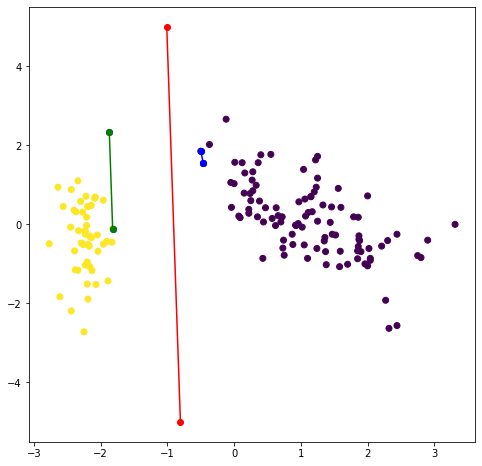

In [15]:
x1, y1 = [ -1.0095, -0.8045], [5, -5]
x2,y2 = [-1.82,-1.87],[-0.11,2.33]
x3,y3 = [-0.5,-0.46],[1.85,1.54]

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(ds2.iloc[:,0],ds2.iloc[:,1],c=ds2['Label'])
plt.scatter(ds2.iloc[23,0],ds2.iloc[23,1],c='blue') #Support Vector
plt.scatter(ds2.iloc[41,0],ds2.iloc[41,1],c='blue') #Support Vector
plt.scatter(ds2.iloc[57,0],ds2.iloc[57,1],c='blue') #Support Vector
plt.scatter(ds2.iloc[98,0],ds2.iloc[98,1],c='blue') #Support Vector
plt.plot(x1, y1, marker = 'o',c='red')
plt.plot(x2, y2, marker = 'o',c='green')
plt.plot(x3, y3, marker = 'o',c='blue')
plt.show()

<b>Now To confirm whether the calculation result is correct, we will call the library to compare it

First we need to define the feature and target/label

In [16]:
feature=ds2.iloc[:,:-1]
target=ds2.iloc[:,2]

Now we need to plot the model based on SVM library, here's the plot

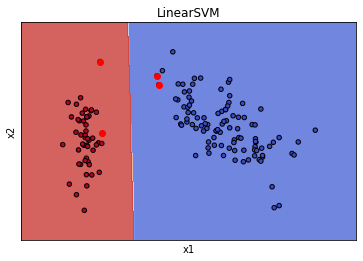

In [17]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(feature, target)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

title = ('LinearSVM')

X0, X1 = feature.iloc[:, 0], feature.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

support_vectors = clf.support_vectors_
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

As we can see, the result from hand calculation and from sklearn library seems give same result, but the hyperplane of the hand calculation are rounded up on the calculation, and make it become little bit miss.

<h3>3. Given 2D datasets (UAS_ML2021_DATASET02.csv) and assuming you do 
understand the concept of unsupervised learning, please carry out the below tasks as thorough 
as possible

Import Dataset

In [18]:
#load data
ds3 = pd.read_csv('datasets/UAS_ML2021_DATASET02.csv').values

Normalization

In [19]:
#using number 1 normalizattion function
scaled_feature = MinMaxValues(ds3)
normalize_dataset(ds3, scaled_feature)

Here's the full code for the GMM, written using class just to make it easily called later.

<b>B. After initializing means, covariance matrix, and phi, demonstrate how 
to calculate responsibilities/weights using E-step of the GMM algorithm and the 
associated log-likelihood

The initialized parameter which is means, covariance and phi have its own function.

- Means or $\mu_{i}$ : Mixture component means
- Covariance or $\Sigma_{i}$ : Mixture component covariance matrices
- Phi or $\pi$ : Weights of mixture components

<b>E-Step</b>

We can write the Gaussian Mixture distribution as a combination of Gaussians with weights equal to $\pi$ as below. Where K is the number of Gaussians we want to model.

![formula](./formula.png)

The results from the formula above will be calculated into the posterior distribution using the formula below. This equation work as Bayes rule where $\pi$ is the prior weights and the likelihood is normal.

![formula](./formula2.png)

<b>C.) Using M-step of the GMM algorithm, now update the values of means, covariance 
and phi of each cluster 

After calculating the posterior in E-step, we need to estimate the parameters of each Gaussian using below formula, and evaluate the log-likelihood. These two steps will be repeated until we met convergence (can be seen when the loss function not change).

<b>Means Formula:

![formula](formula3.png)

<b>Covariance Formula:

![formula](formula4.png)

<b>Phi / weight Formula:

![formula](formula5.png)

<b>Marginal Likelihood (should maximize)

![formula](formula6.png)

<b>D.) Go back to B, calculate new responsibilities/weights and new log-likelihood. Check 
if there is any convergence (loss function doesn't change) of the log-likelihood values.

The E-step and M-step will be repeated according to our itteration, until we found convergence. The convergence will be gained if the loss function doesn't change anymore. 

In [20]:
from scipy.stats import multivariate_normal as mvn
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
    
class GMM:
    def __init__(self, C, iteration):
        self.C = C # number of Guassians/clusters
        self.iteration = iteration
        
    def get_params(self):
        return (self.means, self.pi, self.covariance)
    
    def calc_mean_cov(self, X, prediction):#3b. Initialize parameter
      
        d = X.shape[1]
        labels = np.unique(prediction)
        
        #initializing means, covariance, and phi
        self.initial_means = np.zeros((self.C, d))
        self.initial_cov = np.zeros((self.C, d, d))
        self.initial_pi = np.zeros(self.C)
        
        counter=0
        for label in labels:
            ids = np.where(prediction == label) 
            self.initial_pi[counter] = len(ids[0]) / X.shape[0]
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0)
            de_meaned = X[ids] - self.initial_means[counter,:]
            Nk = X[ids].shape[0] # number of data points 
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk
            counter+=1
        assert np.sum(self.initial_pi) == 1    
            
        return (self.initial_means, self.initial_cov, self.initial_pi)
      
    def _initialise_parameters(self, X): #3b. Initialize parameter
       
        n_clusters = self.C
        kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'auto')
        fitted = kmeans.fit(X)
        prediction = kmeans.predict(X)
        self._initial_means, self._initial_cov, self._initial_pi = self.calc_mean_cov(X, prediction)
            
        return (self._initial_means, self._initial_cov, self._initial_pi)
     
        
    #demonstrate how to calculate responsibilities/weights using E-step of the GMM algorithm and the 
    #associated log-likelihood
    
    #3B.) how to calculate responsibilities/weights using E-step of the GMM algorithm and the associated log-likelihood
    def _e_step(self, X, pi, means, cov):
        
        N = X.shape[0] 
        self.weight = np.zeros((N, self.C))

        const_c = np.zeros(self.C)
        
        self.means = self.means if self._initial_means is None else self._initial_means
        self.pi = self.pi if self._initial_pi is None else self._initial_pi
        self.covariance = self.covariance if self._initial_cov is None else self._initial_cov

        for c in range(self.C):
            # Posterior Distribution
            self.weight[:,c] = self.pi[c] * mvn.pdf(X, self.means[c,:], self.covariance[c])

        # normalize columns
        weight_norm = np.sum(self.weight, axis=1)[:,np.newaxis]
        self.weight /= weight_norm

        return self.weight
    
    #3C) Using M-step of the GMM algorithm, now update the values of means, covariance and phi of each cluster
    def _m_step(self, X, weight):
       
        N = X.shape[0] # Total objects
        C = self.weight.shape[1] # Total clusters
        d = X.shape[1] # Object dimension

        self.pi = np.mean(self.weight, axis = 0) #Update pi / weight

        self.means = np.dot(self.weight.T, X) / np.sum(self.weight, axis = 0)[:,np.newaxis] #update means

        for c in range(C): #Update covariance
            x = X - self.means[c, :]
            
            weight_diag = np.diag(self.weight[:,c])
            x_means = np.matrix(x)
            weight_diag = np.matrix(weight_diag)

            cov_c = x.T * weight_diag * x
            self.covariance[c,:,:]=(cov_c) / np.sum(self.weight, axis = 0)[:,np.newaxis][c]

        return self.pi, self.means, self.covariance
    
    
    def _compute_loss_function(self, X, pi, means, covariance):
        
        N = X.shape[0]
        C = self.weight.shape[1]
        self.loss = np.zeros((N, C))

        for c in range(C):
            dist = mvn(self.means[c], self.covariance[c],allow_singular=True)
            self.loss[:,c] = self.weight[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.weight[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss
    
    def fit(self, X):
        
        d = X.shape[1]
        self.means, self.covariance, self.pi =  self._initialise_parameters(X)
        
        try:
            #Calculate new responsibilities/weights and new log-likelihood.
            #This new calculation will be processed in each iterations
            for run in range(self.iteration):  
                
                #B.) calculate responsibilities/weights using E-step (E-step run/called here)
                self.weight  = self._e_step(X, self.means, self.pi, self.covariance) 
                
                #C.) Using M-step of the GMM algorithm, nupdate the values of means,covariance and phi  (M-step called here)
                self.pi, self.means, self.covariance = self._m_step(X, self.weight)
                loss = self._compute_loss_function(X, self.pi, self.means, self.covariance)
                
                #D.) Check if there is any convergence
                if run % 10 == 0:
                    print("Iteration: %d Loss: %0.6f" %(run, loss))
        
        except Exception as e:
            print(e)
            
        return self
    
    def predict(self, X):
        
        labels = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.means[c,:], self.covariance[c])
        labels  = labels .argmax(1)
        return labels 
    
    def predict_proba(self, X):
        
        post_proba = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            # Posterior Distribution
            post_proba[:,c] = self.pi[c] * mvn.pdf(X, self.means[c,:], self.covariance[c])
    
        return post_proba
   

<b>A. Find the best possible “k” used for GMM clustering algorithm using silhouette 
scores.

In [21]:
from sklearn.metrics import silhouette_score
#C = n_components 5 number of cluster
for n in range (2,5):
    model = GMM(C=n, iteration = 30) #convergence after 20 iteration
    fit_model = model.fit(ds3)
    predict_model = model.predict(ds3)
    
    print("For n =", n,
          "Silhouette_score is :", silhouette_score(ds3, predict_model))

Iteration: 0 Loss: 735.183527
Iteration: 10 Loss: 745.797222
Iteration: 20 Loss: 745.797222
For n = 2 Silhouette_score is : 0.6590914077637684
Iteration: 0 Loss: 967.855595
Iteration: 10 Loss: 968.494407
Iteration: 20 Loss: 968.494407
For n = 3 Silhouette_score is : 0.7347460095225654
Iteration: 0 Loss: 949.194082
Iteration: 10 Loss: 975.445713
Iteration: 20 Loss: 976.536996
For n = 4 Silhouette_score is : 0.595346630021406


As we can see, the best n_components for the model using silhouette scores is $n=3$, where silhouette scores = 0.7347460095225654

<b>C.) Using M-step of the GMM algorithm, now update the values of means, covariance 
and phi of each cluster 

<b> Show the result after update

In [22]:
#C = n_components
model = GMM(C=3, iteration = 20) #(n_components/number of cluster, and epoch of the model)

fit_model = model.fit(ds3)
predict_model = model.predict(ds3)


Iteration: 0 Loss: 967.855595
Iteration: 10 Loss: 968.494407


<b>The means $(\mu)$ values After update

In [23]:
model.means

array([[0.5695549 , 0.50610221],
       [0.84276296, 0.84410818],
       [0.15624982, 0.13801624]])

<b>The covariance ($\Sigma$) values After update

In [24]:
model.covariance

array([[[0.00775964, 0.00145538],
        [0.00145538, 0.00362129]],

       [[0.00316013, 0.00255283],
        [0.00255283, 0.00324619]],

       [[0.0030415 , 0.00252319],
        [0.00252319, 0.00293692]]])

<b>The weight ($\pi$) values After update

In [25]:
model.weight

array([[3.05361049e-08, 9.99999969e-01, 1.19079806e-38],
       [3.23461200e-13, 1.00000000e+00, 5.56155575e-51],
       [9.99999927e-01, 7.33410490e-08, 2.48798434e-12],
       ...,
       [2.14887408e-12, 2.19103147e-39, 1.00000000e+00],
       [1.04690399e-16, 1.56730615e-50, 1.00000000e+00],
       [9.99999998e-01, 1.59982874e-09, 1.92075639e-10]])

<b>D.) Go back to B, calculate new responsibilities/weights and new log-likelihood. Check 
if there is any convergence (loss function doesn't change) of the log-likelihood values.

To check the convergence, let's call again the function to let it know is there any convergence in it?

In [26]:
#C = n_components
model = GMM(C=3, iteration = 50) #(n_components/number of cluster, and epoch of the model)

fit_model = model.fit(ds3)
predict_model = model.predict(ds3)


Iteration: 0 Loss: 967.855595
Iteration: 10 Loss: 968.494407
Iteration: 20 Loss: 968.494407
Iteration: 30 Loss: 968.494407
Iteration: 40 Loss: 968.494407


<b>As we can see here, the loss function didn't change anymore, and this is the prove that there's convergence in it

<b>E.)To confirm your results you may need to call the corresponding GMM python 
library from scikitlearn. Visualize the obtained clusters.

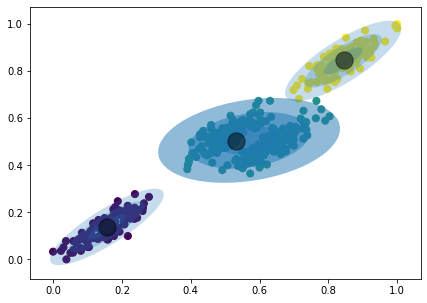

In [27]:
def draw_ellipse(position, covariance, ax=None, **kwargs):

        ax = ax or plt.gca()
    
    # Convert covariance to axes
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
    
    # Draw Ellipse
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))

# Make centers as the point with highest density of distribution
centers = np.zeros((3,2))
for i in range(model.C):
    density = mvn(cov=model.covariance[i], mean=model.means[i]).logpdf(ds3)
    centers[i, :] = ds3[np.argmax(density)]
    
plt.figure(figsize = (7,5))
plt.scatter(ds3[:, 0], ds3[:, 1],c=predict_model ,s=50, cmap='viridis', zorder=1)

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.5, zorder=2);

w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.means, model.covariance, model.pi):
    draw_ellipse(pos, covar, alpha = w)

And here's the result from Scikit-Learn

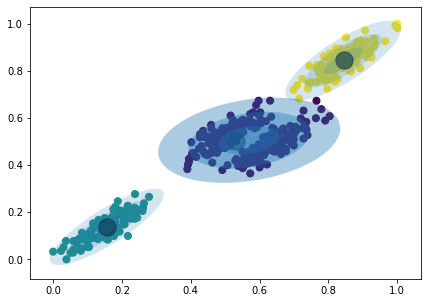

In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(ds3)
prediction_gmm = gmm.predict(ds3)
probs = gmm.predict_proba(ds3)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(ds3)
    centers[i, :] = ds3[np.argmax(density)]

plt.figure(figsize = (7,5))
plt.scatter(ds3[:, 0], ds3[:, 1],c=prediction_gmm ,s=50, cmap='viridis', zorder=1)
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w*.75)

<b>As we can see, the result give the same point, with the scikit-learn result

<b>4.) Based on three (3) variables input namely gmat, gpa, and 
work_experience, you are expected to implement a logistic regression based model that can 
be employed to assist an admission process in a company where you are working for. 

First we need to import the training set, using OCR we will write the training set given into csv file

After the csv file ready, we can import it using pandas read_csv function

In [29]:
ds4 = pd.read_csv('datasets/dataset_uas.csv')
ds4

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


After the training dataset imported, we need to split the feature and target of the dataset

In [30]:
feature = ds4.iloc[:,:-1].values
label = ds4.iloc[:,-1:].values

To give accurate output, we need to normalize the feature (using no 1 normalization function)

In [31]:
#using number 1 normalizattion function
scaled_feature = MinMaxValues(feature)
normalize_dataset(feature, scaled_feature)
feature

array([[1.        , 1.        , 0.4       ],
       [0.875     , 0.95652174, 0.6       ],
       [0.625     , 0.69565217, 0.4       ],
       [0.70833333, 0.86956522, 0.8       ],
       [0.58333333, 0.95652174, 0.6       ],
       [0.79166667, 0.86956522, 1.        ],
       [0.625     , 0.26086957, 0.        ],
       [0.75      , 0.69565217, 0.6       ],
       [0.83333333, 0.69565217, 0.8       ],
       [0.625     , 0.        , 0.        ],
       [0.29166667, 0.43478261, 0.4       ],
       [0.625     , 0.86956522, 0.8       ],
       [0.70833333, 0.86956522, 1.        ],
       [0.58333333, 0.69565217, 0.6       ],
       [0.95833333, 0.69565217, 0.4       ],
       [0.29166667, 0.56521739, 0.        ],
       [0.16666667, 0.43478261, 0.6       ],
       [0.45833333, 0.86956522, 1.        ],
       [0.        , 0.43478261, 0.2       ],
       [0.20833333, 0.26086957, 0.4       ],
       [0.33333333, 0.69565217, 0.2       ],
       [0.25      , 0.13043478, 0.        ],
       [0.

<b>Instruction:</b> Make sure the training dataset above is split for training and 
validation

In [32]:
def train_validation_split(X, y):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 80) #Split into 80% training, and 20% validation

    X_train = X[split]
    X_val =  X[~split]
    y_train = y[split]
    y_val = y[~split]

    return X_train, X_val, y_train, y_val

In [33]:
X_train,X_val,y_train,y_val = train_validation_split(feature,label)

Build the Logistic Regression Model

But before we jump into the code, Here's the Gradient Descent Algorithm for loss function: 

repeat until epoch (until found the convergence){

   - $tmp_{i} =  w_{i}  - \alpha * dwi$

   - $wi = tmpi$         

} 

In [34]:
class Logistic_Regression() :
    
    #init learning rate and epoch    
    def __init__(self) : 
        self.learning_rate = 0.01 #define the learning rate 0.01       
        self.epoch = 2000 #define the epoch 2000
      
    #Update weights/loss function using Gradient Descent     
    def update_weights(self) :           
        A = 1/(1+np.exp(-(self.X.dot(self.W) + self.b)))
          
        # calculate gradients        
        tmp = (A-self.Y.T)        
        tmp = np.reshape(tmp,self.m)        
        dW = np.dot(self.X.T,tmp)/self.m          
        db = np.sum(tmp)/self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW #Gradient Descent Algorithm   
        self.b = self.b - self.learning_rate * db
          
        return self
    
    # Training the model    
    def fit(self, X, Y) :        
        
        # row/total_data, column/total_feature        
        self.m, self.n = X.shape   
        
        # initialization       
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # Update weight, using gradient descent learning as described above   
        for i in range(self.epoch) : #repeat until epoch (2000)          
            self.update_weights() 
        return self  
    
    #Predict function
    def predict(self, X) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

y_train have 2 dimension, reshape y_train

In [35]:
y_train = y_train.reshape(-1)

Fit the model

In [36]:
model = Logistic_Regression()
model.fit(X_train, y_train)

Predict the train & validation

In [37]:
train_prediction = model.predict(X_train)
validation_prediction = model.predict(X_val)

Train & Validation score function

In [38]:
def train_score(X):
    correct = 0    
    count = 0    
    for count in range(np.size(X)):  

        if y_train[count] == X[count] :             
            correct = correct + 1     
        count = count + 1

    print( "Training Accuracy :", (correct / count) * 100 )
    
def validation_score(X):
    correct = 0    
    count = 0    
    for count in range(np.size(X)):  

        if y_val[count] == X[count] :             
            correct = correct + 1     
        count = count + 1

    print( "Validation Accuracy :", (correct / count) * 100 )

Let's try to find the Training accuracy (predicting the training dataset)

In [39]:
train_score(train_prediction)
validation_score(validation_prediction)

Training Accuracy : 90.625
Validation Accuracy : 87.5


Here's the confusion matrix for the training set

<AxesSubplot:xlabel='Prediction', ylabel='Actual'>

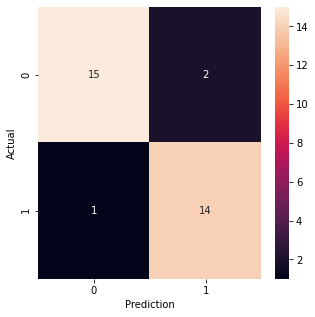

In [40]:
import seaborn as sns
labels1=pd.DataFrame({"Prediction":train_prediction,
                     "Actual":y_train})
confusion_matrix = pd.crosstab(labels1['Actual'],labels1['Prediction'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g')

As we can see here, there's 2 False positive (FP), and 1 False negative (FN) in the training dataset. Now, let's jump into the validation set

<AxesSubplot:xlabel='Prediction', ylabel='Actual'>

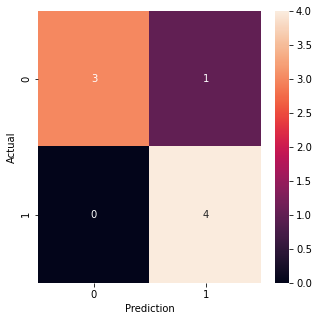

In [41]:
import seaborn as sns
y_val=y_val.reshape(-1)
labels2=pd.DataFrame({"Prediction":validation_prediction,
                     "Actual":y_val})
confusion_matrix = pd.crosstab(labels2['Actual'],labels2['Prediction'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

And here's in our validation result, we found only 1 False Positive (FP)

<b>Predict the testing set

In [42]:
test=pd.DataFrame({"gmat":[590,740,680,610,710],
                 "gpa":[2,3.7,3.3,2.3,3],
                 "work_experience":[3,4,6,1,5]}).values

#using number 1 normalizattion function
scaled_feature = MinMaxValues(test)
normalize_dataset(test, scaled_feature)

prediction = model.predict(test)
prediction

array([0, 1, 1, 0, 1])

<b>My Brief explanation of the model: I think the model work quite well, as we can see here in our confusion matrix, in training dataset, it give only 2 False positive (FP) and 1 False Negative (FN), and the rest of it, is true. And for the validation model, it give only 1 False positive (FP) The model work fine with the 90.625% accuracy for the training set, and 87.5% accuracy for validation set. So as the conclusion the model works very well. Thank you